# Scaling / Timing Analysis

## Setup

Load Python, R, etc.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'RevoUtils', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'RevoUtilsMath', 'methods', 'base'],
      dtype='<U13')

## Load the data

In [4]:
timings = pd.read_csv('build/timing.csv')
timings

,dataset,mptype,threads,run,time
0,ml-100k,sequential,NaN,0,1.418359
1,ml-100k,sequential,NaN,1,1.501745
2,ml-100k,sequential,NaN,2,1.420212
3,ml-100k,sequential,NaN,3,1.390114
4,ml-100k,sequential,NaN,4,1.392838
5,ml-100k,sequential,NaN,5,1.321209
6,ml-100k,sequential,NaN,6,1.392493
7,ml-100k,sequential,NaN,7,1.325616
8,ml-100k,sequential,NaN,8,1.338401
9,ml-100k,sequential,NaN,9,1.185654


Extract the sequential timings:

In [9]:
seq_time = timings[timings.mptype == 'sequential']
omp_time = timings[timings.mptype == 'openmp'].copy()

In [6]:
seq_time.time.describe()

count    10.000000
mean      1.368664
std       0.083642
min       1.185654
25%       1.328813
50%       1.391304
75%       1.411979
max       1.501745
Name: time, dtype: float64

In [7]:
mean_seq = seq_time.time.mean()

In [15]:
omp_time['adj_time'] = mean_seq / omp_time.time
omp_time.head()

,dataset,mptype,threads,run,time,adj_time
10,ml-100k,openmp,NaN,0,5.271813,0.259619
11,ml-100k,openmp,NaN,1,5.270193,0.259699
12,ml-100k,openmp,NaN,2,5.329850,0.256792
13,ml-100k,openmp,NaN,3,5.273720,0.259525
14,ml-100k,openmp,NaN,4,5.311204,0.257694


## Plot OpenMP speedups

In [16]:
omp_means = omp_time[omp_time.threads.notna()].groupby('threads').adj_time.agg(['mean', 'min', 'max']).reset_index()
omp_means

,threads,mean,min,max
0,1.0,1.219527,1.113297,1.303293
1,2.0,1.136079,1.113542,1.153050
2,3.0,0.636505,0.614517,0.657251
3,4.0,0.337449,0.322374,0.357195
4,5.0,0.262011,0.257052,0.277714
5,6.0,0.257458,0.252320,0.268682
6,7.0,0.258003,0.242202,0.263523
7,8.0,0.247269,0.236743,0.282427


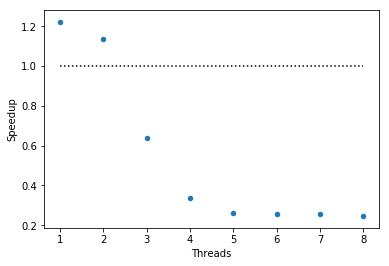

In [28]:
fig, ax = plt.subplots()
omp_means.plot.scatter(x='threads', y='mean', ax=ax)
ax.set_xlabel('Threads')
ax.set_ylabel('Speedup')
plt.hlines(1, 1, 8, linestyles='dotted')
plt.show()

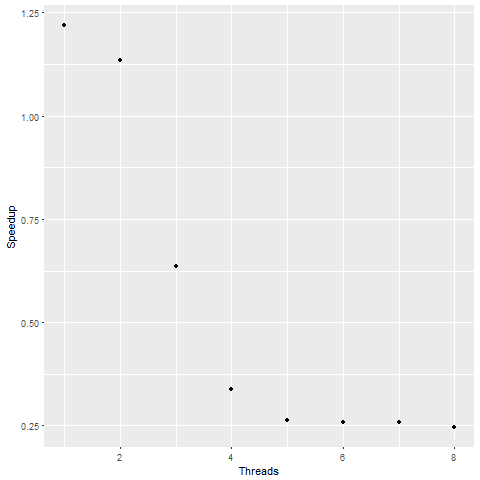

In [18]:
%%R -i omp_means
ggplot(omp_means) +
    aes(x=threads, y=mean) +
    geom_point() +
    xlab("Threads") +
    ylab("Speedup")